In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
dataset_path = "/Users/kristapsalmanis/Downloads/natural_images"
batch_size = 32

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  batch_size=batch_size)

Found 6899 files belonging to 8 classes.
Using 5520 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  batch_size=batch_size)

Found 6899 files belonging to 8 classes.
Using 1379 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
173/173 [==============================] - 64s 351ms/step - loss: 0.8125 - accuracy: 0.7342 - val_loss: 0.4001 - val_accuracy: 0.8354
Epoch 2/10
173/173 [==============================] - 66s 382ms/step - loss: 0.2380 - accuracy: 0.9096 - val_loss: 0.3422 - val_accuracy: 0.8586
Epoch 3/10
173/173 [==============================] - 68s 395ms/step - loss: 0.1244 - accuracy: 0.9567 - val_loss: 0.3217 - val_accuracy: 0.8970
Epoch 4/10
173/173 [==============================] - 69s 396ms/step - loss: 0.0791 - accuracy: 0.9721 - val_loss: 0.3338 - val_accuracy: 0.8970
Epoch 5/10
173/173 [==============================] - 70s 406ms/step - loss: 0.0556 - accuracy: 0.9815 - val_loss: 0.3533 - val_accuracy: 0.9036
Epoch 6/10
173/173 [==============================] - 76s 441ms/step - loss: 0.0295 - accuracy: 0.9915 - val_loss: 0.3867 - val_accuracy: 0.8963
Epoch 7/10
173/173 [==============================] - 73s 423ms/step - loss: 0.0250 - accuracy: 0.9935 - val_loss: 0.4617 - val_ac

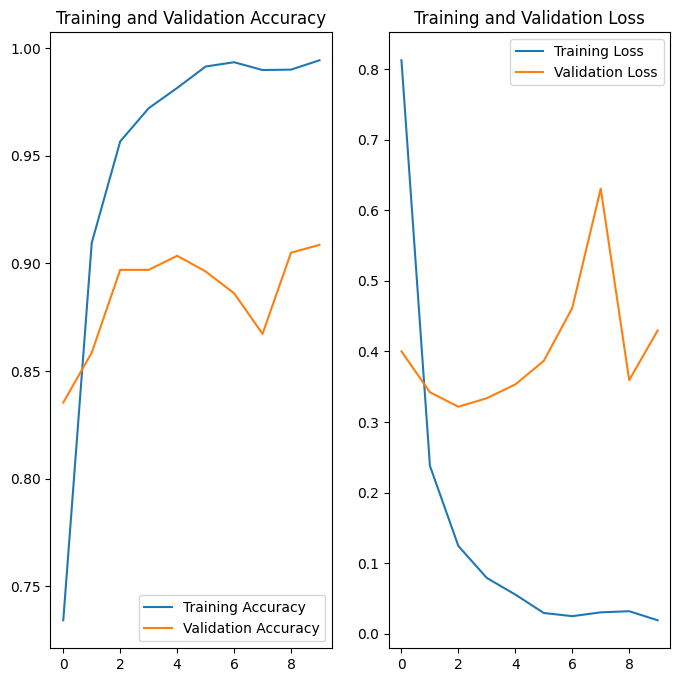

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
model.save('natural_model.h5')

/opt/homebrew/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
